In [18]:
import torch
import numpy as np
from scipy import linalg
from torch.autograd import Variable
from torch.nn.functional import adaptive_avg_pool2d
import argparse
from shutil import copyfile
from src.config import Config
from src.edge_connect import EdgeConnect
from PIL import Image
from PIL import Image, ImageChops


In [19]:
import os
import cv2
import random
import numpy as np
import torch
import argparse
from shutil import copyfile
from src.config import Config
from src.edge_connect import EdgeConnect

In [ ]:
import numpy as np
drawing = False  # True if the mouse is pressed
ix, iy = -1, -1  # Initial mouse coordinates

def draw_mask(event, x, y, flags, param):
    global ix, iy, drawing, mask

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(mask, (ix, iy), (x, y), (255, 255, 255), -1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(mask, (ix, iy), (x, y), (255, 255, 255), -1)

image = cv2.imread('1.jpg')
mask = np.zeros_like(image)

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_mask)

while True:
    # Display the image and the mask
    combined = cv2.addWeighted(image, 0.7, mask, 0.3, 0)
    cv2.imshow('image', combined)
    
    # Wait for the 'q' key to be pressed to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

result = cv2.bitwise_and(image, mask)

# Display the result
cv2.imshow('Masked Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
# Load the images
image1 = cv2.imread('1.jpeg')

In [ ]:
height, width, _ = image1.shape

In [ ]:
# Resize image2 to match the size of image1
image2 = cv2.imread('mask_temp.png')

In [ ]:
image2_resized = cv2.resize(image2, (width, height))


In [21]:
import matplotlib.pyplot as plt

In [20]:


plt.imshow(cv2.cvtColor(superimposed_image, cv2.COLOR_BGR2RGB))
plt.title('Superimposed Image')
plt.axis('off')
plt.show()


NameError: name 'superimposed_image' is not defined

In [ ]:
def apply_mask(original_image, mask_image):
    # Resize original image to match the size of the mask image
    original_image_resized = original_image.resize(mask_image.size)

    # Convert mask image to grayscale
    mask_gray = mask_image.convert('L')

    # Create white patches on resized original image based on mask
    result_image = original_image_resized.copy()
    mask_array = np.array(mask_gray)
    result_image_np = np.array(result_image)
    result_image_np[mask_array == 255] = (255, 255, 255)  # Set pixels to white where mask is white
    result_image = Image.fromarray(result_image_np)

    return result_image

In [ ]:
def apply_mask(original_image, mask_image):
    original_image_resized = original_image.resize(mask_image.size)

    white_image = Image.new('RGB', mask_image.size, (255, 255, 255))

    # Paste the white pixels onto the new white image based on the mask
    white_image.paste(original_image_resized, mask=mask_image)

    return white_image


In [11]:
def apply_inverse_mask(original_image, mask_image):
    original_image_resized = original_image.resize(mask_image.size)

    white_image = Image.new('RGB', mask_image.size, (255, 255, 255))

    # Invert the mask image
    inverted_mask = ImageChops.invert(mask_image)

    # Paste the original image onto the new white image based on the inverted mask
    white_image.paste(original_image_resized, mask=inverted_mask)

    return white_image

# # Load the images
# original_image = Image.open("1.jpeg")
# mask_image = Image.open("mask_temp.png")

# # Apply the inverse mask
# result_image = apply_inverse_mask(original_image, mask_image)

# result_image

In [13]:
image_xx = Image.open("to_process/Foto.png")
image_yy = Image.open("temp/masks/mask_temp.png")
result_image = apply_inverse_mask(image_xx, image_yy)

In [14]:
result_image.save("mask_2.png")

In [ ]:
mask_image.save("mask_22.png")

In [ ]:
!python test.py --model 2 --checkpoints checkpoints/places2 --input myexamples/places2/images --mask myexamples/places2/masks--output checkpoints/results

In [ ]:
!python test.py  --checkpoints checkpoints/celeba  --input examples/celeba/images --mask examples/celeba/masks --output checkpoints/results

In [ ]:
!python test.py  --checkpoints checkpoints/places2  --input myexample/places2/images --mask myexample/places2/masks --output checkpoints/results

In [22]:
from PIL import Image
from PIL import Image, ImageChops

In [23]:
img = Image.open("WhatsApp Image 2024-05-25 at 21.11.14.jpeg")

In [24]:
img.size[0]

1024

In [25]:
def change_transparent_to_black(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGBA")

    # Create a new image with a black background
    black_bg = Image.new("RGBA", image.size, (0, 0, 0, 255))

    # Paste the original image onto the black background
    black_bg.paste(image, (0, 0), image)

    return black_bg.convert("RGB")  

In [26]:
img2= change_transparent_to_black("myexample/places2/masks/mask_temp.png")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/apple/Desktop/edge-connect/myexample/places2/masks/mask_temp.png'

In [ ]:
img2.save("myexample/places2/masks/mask_2.png")

In [27]:
img3 = Image.open("checkpoints/results/mask_2.png")

In [38]:
image = cv2.imread("output/mask_temp.png")

bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
# bgr_image=cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

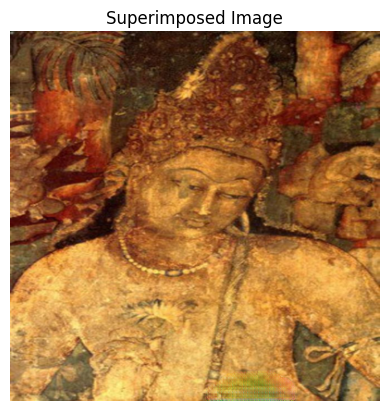

In [39]:
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title('Superimposed Image')
plt.axis('off')
plt.show()

In [6]:
def apply_inverse_mask(original_image, mask_image):
    "return the masked images"
    original_image_resized = original_image.resize(mask_image.size)

    white_image = Image.new('RGB', mask_image.size, (255, 255, 255))

    # Invert the mask image
    inverted_mask = ImageChops.invert(mask_image)

    # Paste the original image onto the new white image based on the inverted mask
    white_image.paste(original_image_resized, mask=inverted_mask)

    return white_image